# Pytorch 이란?

META 에서 만든 파이썬 기반 딥러닝 프레임워크로 신경망 모델 제작에 있어 현재 가장 대중적인 언어입니다.  

- 동적 계산 그래프(Define-by-Run): 실행 시점에 계산 그래프를 생성해, 네트워크 구조를 자유롭게 바꾸고, 디버깅이 쉽습니다. 복잡하거나 변화가 잦은 모델을 만들 때 특히 유리합니다.

- Pythonic 코드 스타일: 파이썬과 매우 유사한 문법으로, 기존 파이썬 생태계(NumPy, SciPy 등)와 쉽게 통합됩니다. 파이썬 개발자에게 친숙하고 직관적입니다.

- 강력한 GPU 가속: CUDA를 통한 GPU 지원으로 대규모 데이터와 복잡한 모델도 빠르게 학습할 수 있습니다.

- 자동 미분(Autograd): 텐서 연산에 대한 미분을 자동으로 계산해, 복잡한 신경망 학습을 쉽게 구현할 수 있습니다.

- 풍부한 커뮤니티와 생태계: 다양한 튜토리얼, 오픈소스 프로젝트, 연구 논문이 PyTorch를 기반으로 제공됩니다.

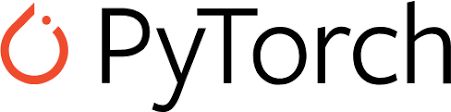

## 1. Pytorch의 기본 다루기: 텐서 (Tensor)

### 1.1 Pytorch 데이터 표현: 텐서 (Tensor)

텐셔는 Pytorch에서 다루는 데이터를 부르는 단위로 다차원(n-dim)의 데이터를 표현한다.
텐서를 이루는 요소는 다음과 같다.

- shape: 배열의 크기와 차원 정보
- dtype: 데이터 타입 (예: float32, int64 등)
- device: CPU 또는 GPU 등 저장된 장치
- requires_grad: 자동 미분을 위한 설정 (딥러닝 학습 시 중요)

In [ ]:
import torch

# 3x3 텐서 생성
x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(x)
print("Shape of tensor:", x.shape)      # torch.Size([2, 3])
print("Type of tensor:", x.dtype)      # torch.float32 (기본값)
print("Allocated device:", x.device)     # cpu 또는 cuda
print("랭크(차원):", x.ndimension())

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Shape of tensor: torch.Size([3, 3])
Type of tensor: torch.float32
Allocated device: cpu
랭크(차원): 2


In [ ]:
# 예제: (3x3x1) 크기를 가지는 텐서 만들기

# 정답
# x = torch.Tensor([[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]])
# print("Shape of tensor:", x.shape)      # torch.Size([2, 3])

### 1.2 텐서 (Tensor) 차원 크기 다루기

In [ ]:
# 텐서 다루기 (모양 확인)

# 특정 차원에 대해 1 랭크 올리기
x = torch.unsqueeze(x, 0) # shape (1, 3, 3)

# 1 크기의 차원을 가지는 랭크 없애기
x = torch.squeeze(x) # shape (3, 3)

# 텐서 모양 변경
x = x.view(9) # shape (9, )

In [ ]:
# 예제: (3x3x1) 크기를 가지는 텐서 만들기

# 정답
# x = torch.Tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# x = torch.unsqueeze(x, 2) # shape (1, 3, 3)
# print("Shape of tensor:", x.shape)      # torch.Size([2, 3])

### 1.3 손쉽게 유용한 텐서 (Tensor) 만들기

In [ ]:
# 1. 크기만 지정해서 비어있는 텐서 생성 (초기값은 임의의 값)
empty_tensor = torch.empty(3, 3)
print("empty_tensor:", empty_tensor)

# 2. 0으로 채워진 텐서 생성
zeros_tensor = torch.zeros(3, 3)
print("zeros_tensor:", zeros_tensor)

# 3. 1로 채워진 텐서 생성
ones_tensor = torch.ones(3, 3)
print("ones_tensor:", ones_tensor)

# 4. 랜덤 값으로 채워진 텐서 생성
rand_tensor = torch.rand(3, 3)
print("rand_tensor:", rand_tensor)

empty_tensor: tensor([[ 2.0720e-15,  0.0000e+00, -6.6055e+28],
        [ 4.5856e-41,  1.4013e-45,  1.2612e-44],
        [ 8.6320e-43,  0.0000e+00, -6.6055e+28]])
zeros_tensor: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
ones_tensor: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
rand_tensor: tensor([[0.6155, 0.5228, 0.1262],
        [0.3520, 0.1862, 0.8891],
        [0.1366, 0.3944, 0.0133]])


### 1.4 주로 쓰이는 데이터의 텐서

### 이미지 데이터의 텐서

- 흑백 이미지(1채널):

    타입: 0 ~ 255 int

    모양: (1, height, width)
   
    *예시*: ( 1, 28, 28) → 64장의 흑백 이미지, 각 이미지는 1채널, 28x28 픽셀


- 컬러 이미지(RGB, 3채널):

    타입: 0 ~ 255 int
    
    모양: (channel, height, width)
    
    예시: (3, 224, 224) → 3채널(RGB), 세로 224, 가로 224 픽셀



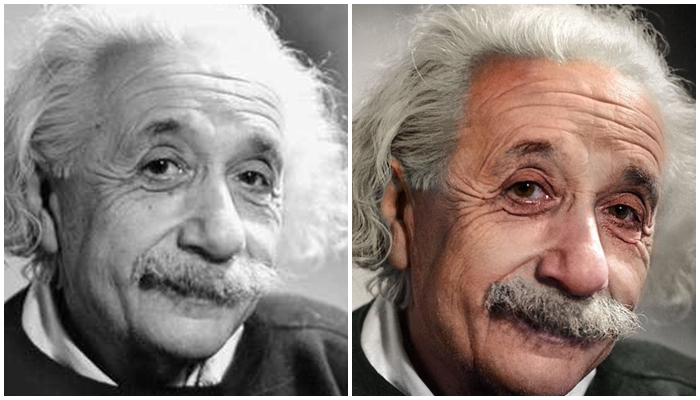

### 텍스트 데이터의 텐서

- 일반적인 자연어 데이터 (NLP) 입력:

    타입: int (글자 별로 특정 정수에 할당)

    모양: (sequence_length) -> 입력 문장 길이
    
    예시: (50) → 50개의 토큰 (단어/문자)

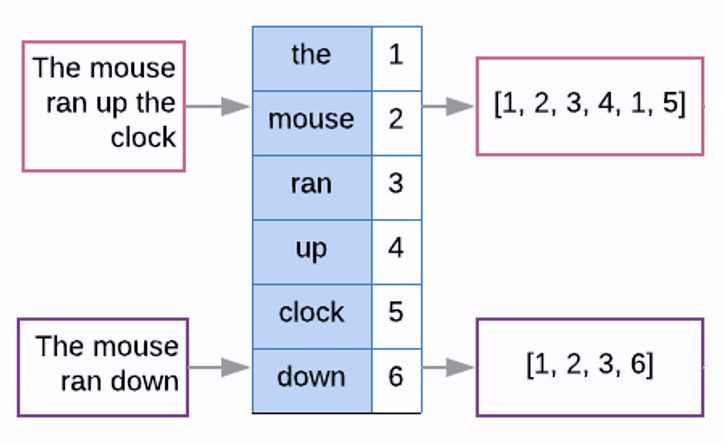

## 2. Pytorch로 간단한 신경망 만들기

완전 연결층 (Fully connected layer) 2층으로 이뤄진 신경망 모델을 만들고 MNIST 데이터셋을 이용한 손글씨 분류 문제를 폴어보자.

###2.1 Pytorch 모듈로 신경망 모델 구성하기

대표적인 신경망 층은 모두 pytorch의 "torch.nn" 모듈에 담겨있다.

- 완전 연결 층 : nn.Linear(input_size, output_size)
- 활성화 함수 층 : nn.ReLU()

pytorch로 신경망 모델을 구성하는 방법은 python의 class 문법을 따른다.

룰은 다음과 같다.

- nn.Module 이라는 부모 클레스를 상속 받을 것.
- 다음 아래의 함수를 class에 꼭 포함시킬 것. 각 함수의 역할은 다음과 같다.
1. \_\_init\_\_ : 모델에서 사용할 pytorch 신경망 층 불러오기
2. forward : 신경망 모델의 구조 구성하기

In [ ]:
import torch
import torch.nn as nn

# 모델 정의 (2층 FC 신경망)
class simple_model(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(simple_model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # 첫 번째 FC 레이어
        self.relu = nn.ReLU()                          # 활성화 함수
        self.fc2 = nn.Linear(hidden_size, num_classes) # 두 번째 FC 레이어

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

### 2.2 데이터 준비하기

손글씨 분류 모델을 위해 MNIST 데이터 셋을 준비하자.

MNIST 데이터셋은 (28,28)의 크기의 손글씨 이미지로 학습 데이터 50000개, 평가 데이터 10000개로 구성되어있다.

In [ ]:
import torchvision
from torchvision import transforms


# MNIST 데이터 로드
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(),  download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',  transform=transforms.ToTensor(), train=False)

image, label = train_dataset[0]
print(image.shape)  # torch.Size([1, 28, 28])
print(label)        # 5

# 데이터 로더
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.52MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 57.4kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.25MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.72MB/s]

torch.Size([1, 28, 28])
5


### 2.3 모델 학습을 위한 모델 구성 및 학습 파라미터 설정

손글씨 분류 모델을 학습하기 위해 데이터에 맞춰진 모델 구조로 모델을 초기화 하고 학습에 필요한 "손실함수" "옵티마이져" 를 설정한다.
- 손실함수 (loss function) : 모델의 예측값이 실제 정답과 얼마나 가까운 지 평가하는 함수
    
    ex) cross entropy (CE)

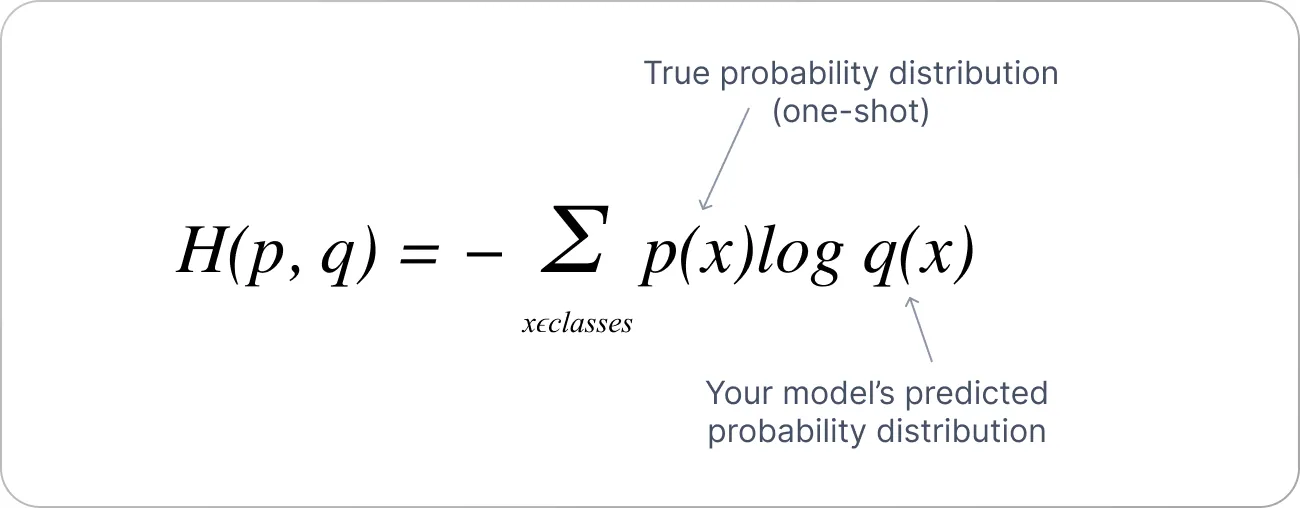


- 옵티마이져 (optimizier) : 손실 함수로 부터 얻은 손실 값을 최소화 하기 위해 가중치를 업데이트 시키는 방법

ex) gradient descent (GD)

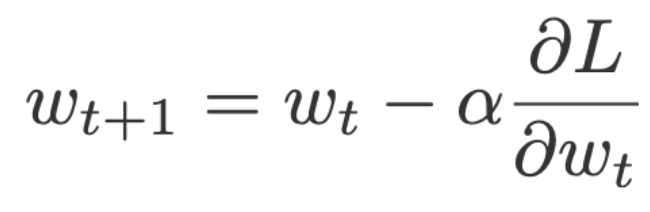

- 학습률 (learning rate) 의 의미 : 얼마나 많은 양 (그레디언트 값) 으로 가중치를 업데이트 할 것인가?

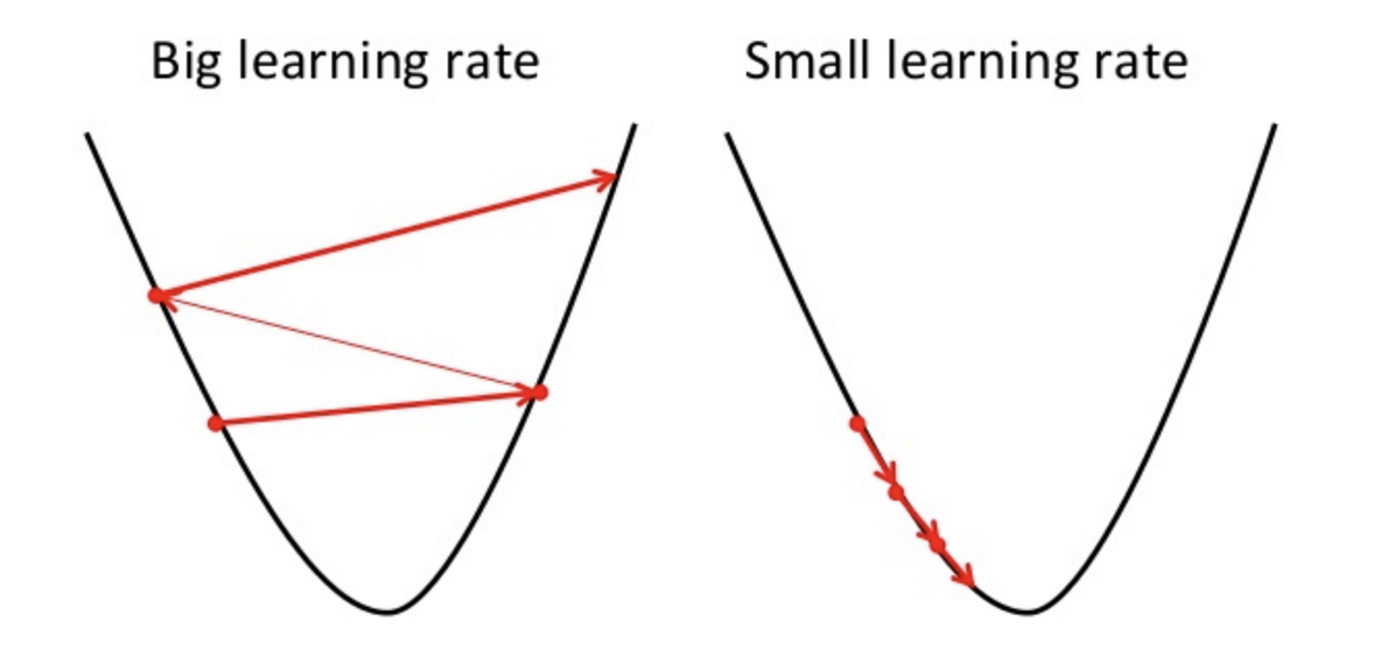

In [ ]:
# 하이퍼파라미터 설정
input_size = 784    # 28x28
hidden_size = 256   # 은닉층 유닛 수
num_classes = 10    # 0-9 숫자 분류
learning_rate = 1e-2

# 모델 초기화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = simple_model(input_size, hidden_size, num_classes).to(device)

# 손실 함수와 옵티마이져 설정하기
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 2.4 모델 학습 및 평가 루프 만들기

학습은 데이터를 통해 신경망 모델이 원하는 목적을 달성하도록 가중치를 업데이트 하는 과정이다.

신경망 가중치 업데이트는 배치 단위 (batch) 로 이뤄지며 이는 소규모의 데이터 뭉치이다.

배치 단위로 학습하는 이유는 안정적인 학습을 제공하기 때문이다.

특히, 신경망 모델의 안정적 학습은 모델 성능과 직결되기 때문에 매우 중요하다.

In [ ]:
# 학습 루프
num_epochs = 10 # 데이터셋의 데이터를 모두 사용해서 총 몇번 반복해 학습할 것인가?

for epoch in range(num_epochs): # 에폭 단위 학습
    for i, (images, labels) in enumerate(train_loader): # 배치 단위 학습
        # FC 학습을 위해 2D 이미지를 1차원의 벡터로 변경 (batch_size, 1, 28, 28) → (batch_size, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = model(images) # 모델로 부터 예측 값 얻기
        loss = criterion(outputs, labels) # 손실 함수를 이용해 정답 라벨과 차이 정도 계산

        # 역전파
        optimizer.zero_grad() # 모든 gradient 0으로 초기화
        loss.backward() # 손실 함수 값 바탕으로 각 가중치의 gradient 계산하기
        optimizer.step() # gradient 값 바탕으로 가중치 업데이트 하기

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.4367
Epoch [2/10], Loss: 0.4055
Epoch [3/10], Loss: 0.3034
Epoch [4/10], Loss: 0.5060
Epoch [5/10], Loss: 0.3218
Epoch [6/10], Loss: 0.2685
Epoch [7/10], Loss: 0.1634
Epoch [8/10], Loss: 0.1214
Epoch [9/10], Loss: 0.0967
Epoch [10/10], Loss: 0.0800


In [ ]:
# 테스트셋을 이용해 모델의 정확도 평가하기
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader: # 테스트 데이터 불러오기
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images) # 학습된 모델로부터 테스트 데이터의 예측 값 얻기
        _, predicted = torch.max(outputs.data, 1) # 가장 확률이 높은 숫자 값 가져오기
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%') # 테스트 데이터셋의 전체 정확도

Test Accuracy: 94.82%


### 3. 더 나은 모델 만들기

모델을 새롭게 구성하거나 학습 방법을 바꿔 문제 해결을 더 잘하는 모델을 만들 수 있다. 이를 위한 가이드 질문은 다음과 같다.
- 학습률 및 에폭은 얼마의 크기로 설정할 것인가?
- 모델을 구성함에 있어 히든 사이즈는 몇으로 해야하는 가?
- 신경망 층은 몇 층으로 쌓아야 하는 가?
- 활성화 함수는 무엇을 사용할 것인 가?
- 손실 함수와 옵티마이져는 무엇을 사용할 것인가?
- 혹여 모델의 학습에서 **과적합**을 불러일으키지는 않는 가?

* 과적합이란?

모델이 훈련 데이터(학습 데이터)에 너무 지나치게 맞춰져서, 새로운 데이터(테스트 데이터)에는 일반화가 잘 되지 않는 현상이다.
즉, 모델이 훈련 데이터의 패턴뿐만 아니라 노이즈(잡음)나 불필요한 정보까지 학습해서, 새로운 데이터에 대해 좋은 성능을 내지 못하는 상태를 일으키는 것을 말한다.

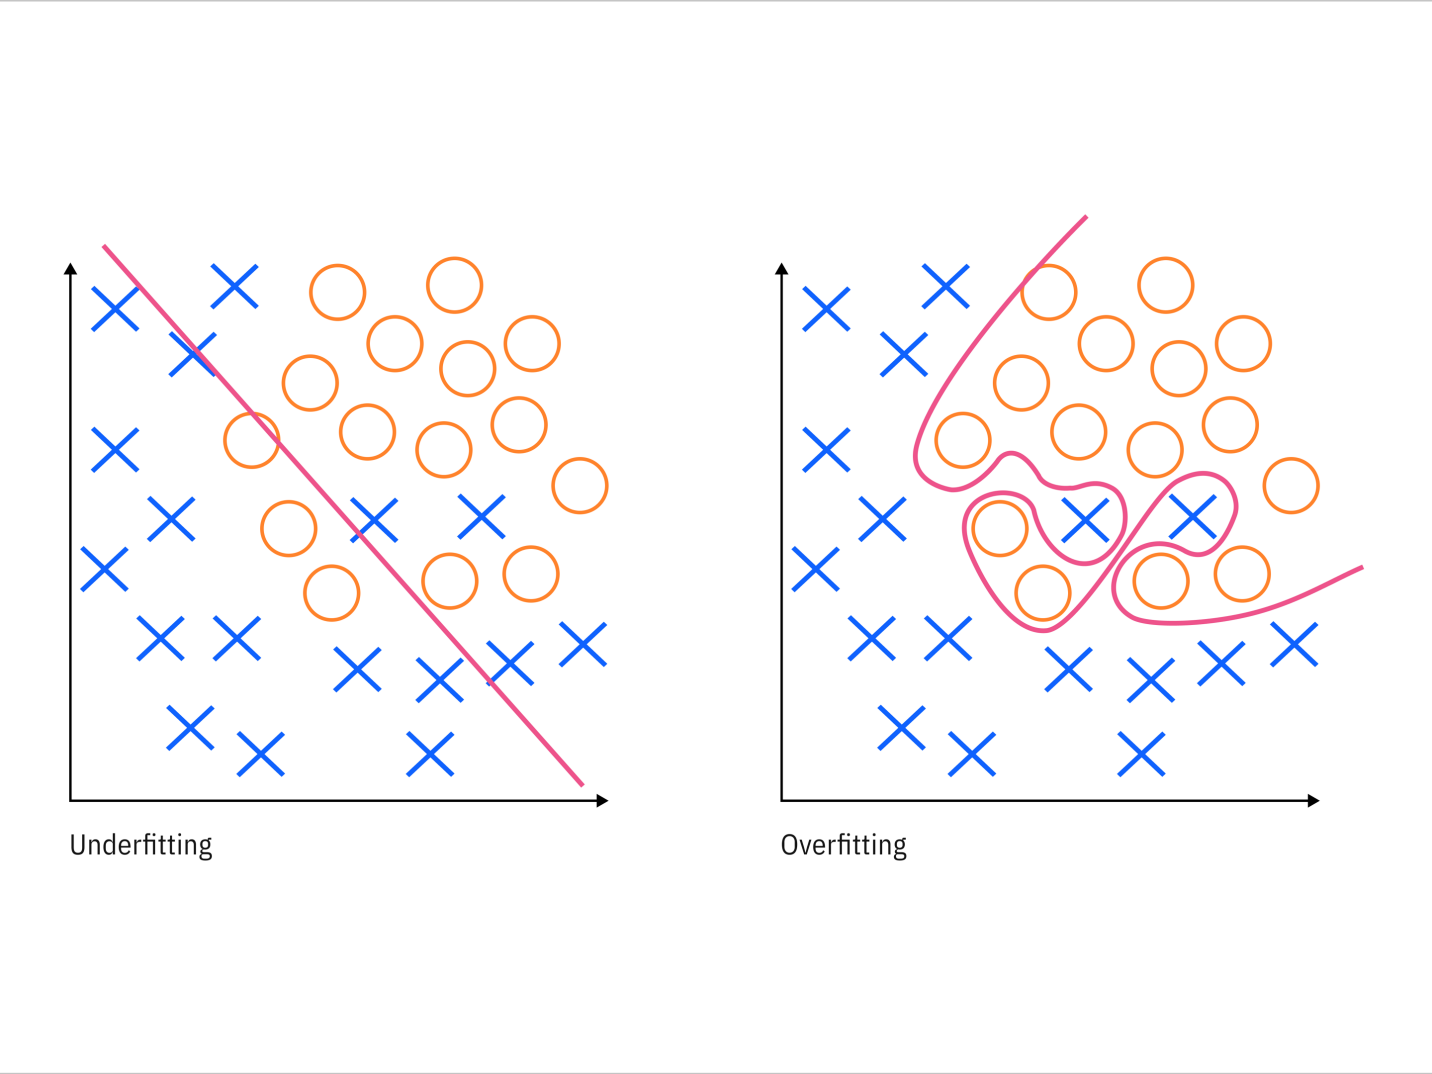

과적합을 피하려면??

규제 방법 (regularization method) 을 잘 활용하자.

- 드롭 아웃 (dropout) : 임의로 신경망 가중치의 값을 0으로 전환시켜 일반화된 가중치를 만들도록 함.
- L1, L2 norm : 손실 함수의 규제를 주어 가중치가 일정한 크기 이상으로 벗어나지 않도록 함.

In [ ]:
# 드롭아웃이 적용된 2층 FC 모델
class simple_model_with_dropout(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout_prob=0.5):
        super(simple_model_with_dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)  # 드롭아웃 레이어
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)  # 드롭아웃 적용
        out = self.fc2(out)
        return out

# 하이퍼파라미터 설정
input_size = 784    # 28x28 픽셀
hidden_size = 256   # 은닉층 유닛 수
num_classes = 10    # 0-9 숫자 분류
learning_rate = 1e-2
dropout_prob = 0.1  # 드롭아웃 확률

# 모델 초기화
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = simple_model_with_dropout(input_size, hidden_size, num_classes, dropout_prob).to(device)

# 손실 함수와 옵티마이져 설정하기
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 학습 루프
num_epochs = 10 # 데이터셋의 데이터를 모두 사용해서 총 몇번 반복해 학습할 것인가?

for epoch in range(num_epochs): # 에폭 단위 학습
    for i, (images, labels) in enumerate(train_loader): # 배치 단위 학습
        # FC 학습을 위해 2D 이미지를 1차원의 벡터로 변경 (batch_size, 1, 28, 28) → (batch_size, 784)
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # 순전파
        outputs = model(images) # 모델로 부터 예측 값 얻기
        loss = criterion(outputs, labels) # 손실 함수를 이용해 정답 라벨과 차이 정도 계산

        # 역전파
        optimizer.zero_grad() # 모든 gradient 0으로 초기화
        loss.backward() # 손실 함수 값 바탕으로 각 가중치의 gradient 계산하기
        optimizer.step() # gradient 값 바탕으로 가중치 업데이트 하기

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.8698
Epoch [2/10], Loss: 0.2258
Epoch [3/10], Loss: 0.2082
Epoch [4/10], Loss: 0.2500
Epoch [5/10], Loss: 0.1943
Epoch [6/10], Loss: 0.4395
Epoch [7/10], Loss: 0.2149
Epoch [8/10], Loss: 0.4811
Epoch [9/10], Loss: 0.1191
Epoch [10/10], Loss: 0.1348


In [ ]:
# 테스트셋을 이용해 모델의 정확도 평가하기
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader: # 테스트 데이터 불러오기
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images) # 학습된 모델로부터 테스트 데이터의 예측 값 얻기
        _, predicted = torch.max(outputs.data, 1) # 가장 확률이 높은 숫자 값 가져오기
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Test Accuracy: {100 * correct / total:.2f}%') # 테스트 데이터셋의 전체 정확도

Test Accuracy: 95.10%


### 해보기: 자신만의 방법으로 모델 정확도 높이기